<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/Home_builder_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Download Data**

In [1]:
!wget https://www.nahb.org/-/media/NAHB/news-and-economics/docs/housing-economics/hmi/2025-08/t2-national-hmi-history-202508.xls

--2025-08-21 17:20:24--  https://www.nahb.org/-/media/NAHB/news-and-economics/docs/housing-economics/hmi/2025-08/t2-national-hmi-history-202508.xls
Resolving www.nahb.org (www.nahb.org)... 172.66.145.39, 104.20.17.77, 2606:4700:10::6814:114d, ...
Connecting to www.nahb.org (www.nahb.org)|172.66.145.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35840 (35K) [application/vnd.ms-excel]
Saving to: ‘t2-national-hmi-history-202508.xls’

t2-national-hmi-his 100%[===================>]  35.00K  --.-KB/s    in 0.003s  

2025-08-21 17:20:24 (10.2 MB/s) - ‘t2-national-hmi-history-202508.xls’ saved [35840/35840]



### **Import Libraries**

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **Get Data**

In [9]:
df = pd.read_excel('/content/t2-national-hmi-history-202508.xls', skiprows=2)
df.columns = ['Year','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df.head()

Year  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug   Sep   Oct   Nov   Dec
0  1985   50   58   54   49   51   54   58   58  56.0  59.0  58.0  57.0
1  1986   57   55   57   62   64   65   59   55  57.0  64.0  59.0  64.0
2  1987   63   60   60   59   55   56   55   54  52.0  50.0  56.0  51.0
3  1988   53   51   51   52   54   49   54   56  53.0  49.0  58.0  60.0
4  1989   54   53   48   44   44   45   46   50  51.0  48.0  46.0  43.0

In [40]:
df_long = pd.melt(df,
                  id_vars=['Year'],
                  value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                  var_name='Month',
                  value_name='HMI')
month_map = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
             'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
             'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
df_long['Period'] = pd.to_datetime(df_long['Year'].astype(str) + '-' +
                                   df_long['Month'].map(month_map) + '-01').dt.to_period('M')
df_long['Date_for_plot'] = df_long['Period'].dt.to_timestamp()
df_long = df_long.sort_values(by='Date_for_plot')
df_long.dropna(inplace=True)
df_long.head()

Year Month   HMI   Period Date_for_plot
0    1985   Jan  50.0  1985-01    1985-01-01
41   1985   Feb  58.0  1985-02    1985-02-01
82   1985   Mar  54.0  1985-03    1985-03-01
123  1985   Apr  49.0  1985-04    1985-04-01
164  1985   May  51.0  1985-05    1985-05-01

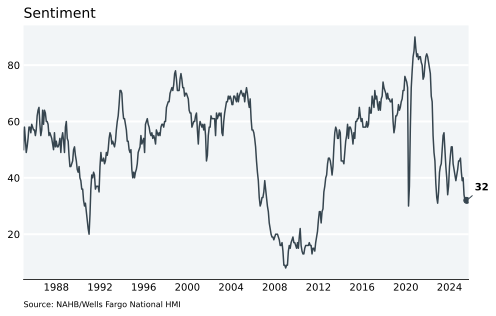

In [43]:
fig = plt.figure(dpi=300, tight_layout=True, figsize=(7, 4.5))
ax = plt.axes(facecolor=(.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)

for key in 'left', 'right', 'top':
    ax.spines[key].set_visible(False)
ax.text(0., 1.03, s='Sentiment', transform=ax.transAxes, size=14)
ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)
plt.plot(df_long['Date_for_plot'], df_long['HMI'], color='#36454F')

# --- highlight latest value ---
x_last = df_long['Date_for_plot'].iloc[-1]
y_last = df_long['HMI'].iloc[-1]

# dot on the last point
ax.scatter([x_last], [y_last], s=36, color='#36454F', zorder=5)

# leader line + value label above it
ax.annotate(f"{y_last:,.0f}",
            xy=(x_last, y_last),            # point to label
            xytext=(8, 8),                 # (x, y) offset in points
            textcoords='offset points',
            ha='left', va='bottom',
            fontsize=10, fontweight='bold',
            arrowprops=dict(arrowstyle='-', lw=1, color='#36454F'))
ax.set_xlim(df_long['Date_for_plot'].min(), x_last + pd.DateOffset(months=2))
ax.annotate("Source: NAHB/Wells Fargo National HMI",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)
fig.savefig('./home_builder_sentiment.png')
plt.show()